In [1]:
#standard imports
import numpy as np
import pandas as pd
import math
import scipy
from scipy.interpolate import interp1d
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd
from os import listdir
#from PIL import Image
from skimage import io
%matplotlib inline

#change default plot settings
default_figsize = mpl.rcParamsDefault['figure.figsize']
mpl.rcParams['figure.figsize'] = [1.5*val for val in default_figsize]
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 24}

mpl.rc('font', **font)
mpl.rc('axes', linewidth=3)

#Constants
pi = math.pi
heV = 4.14e-15 #eV*s
c = 2.99792e8 #m/s
kbeV = 8.6173e-5 #eV/K
keV = 8.6173e-5 #eV/K
h = 6.626e-34
kb = 1.38065e-23
q = 1.60218e-19
k = 1.3806488e-23
T = 293

In [2]:
#Now extract PLQY from widefield images and plot
#Specify Directory
directory_WF = '2018_8-16WF'

#Get all files in directory
names_WF = []
for file in listdir(directory_WF):
    names_WF.append(file)

names_WF

['2018_8-16 FAGACs_2p5PEAI_PTAA_G46_M5x_ND25_25ms',
 '2018_8-16 FAGACs_2p5PEAI_PTAA_PFN-P2_G46_M5x_ND25_25ms',
 '2018_8-16 FAGACs_2p5PEAI_PTAA_PFN-P2_G46_M5x_ND25_25ms_v2',
 '2018_8-16 FAGACs_PTAA_G46_M5x_ND25_100ms',
 '2018_8-16 FAGACs_PTAA_PFN-P2_G46_M5x_ND25_100ms']

In [3]:
ii = 0
directory_WF + '/' + names_WF[ii] + '/' 'Pos0/' + 'img_000000000_Default_000.tif'

'2018_8-16WF/2018_8-16 FAGACs_2p5PEAI_PTAA_G46_M5x_ND25_25ms/Pos0/img_000000000_Default_000.tif'

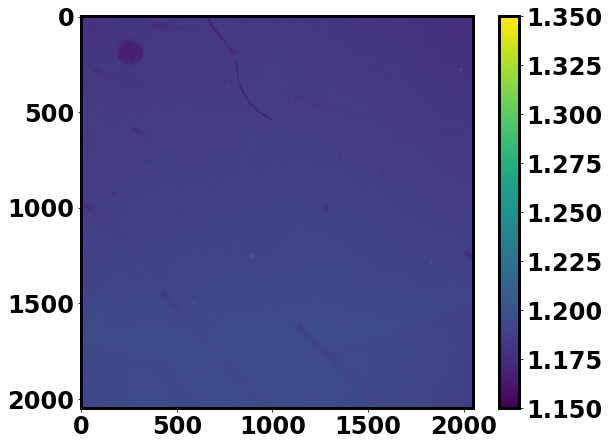

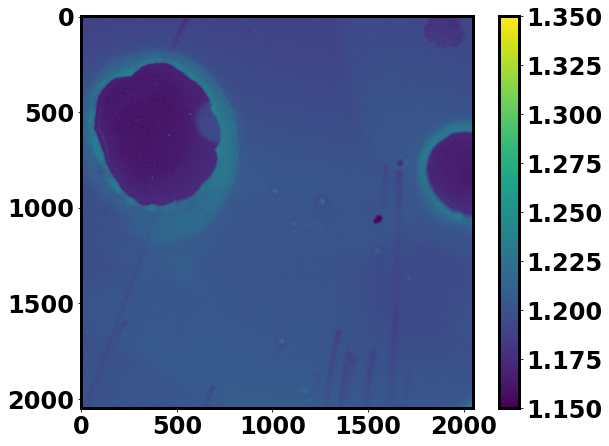

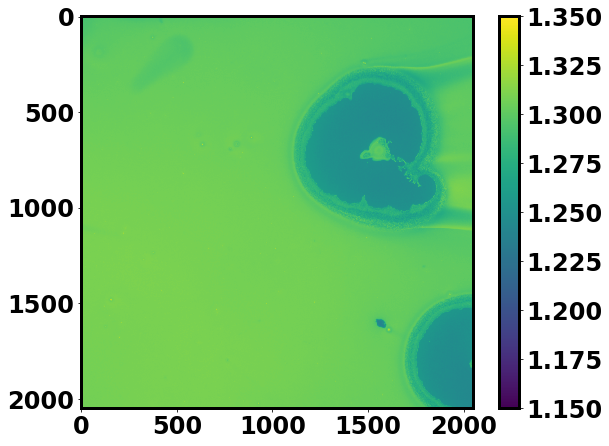

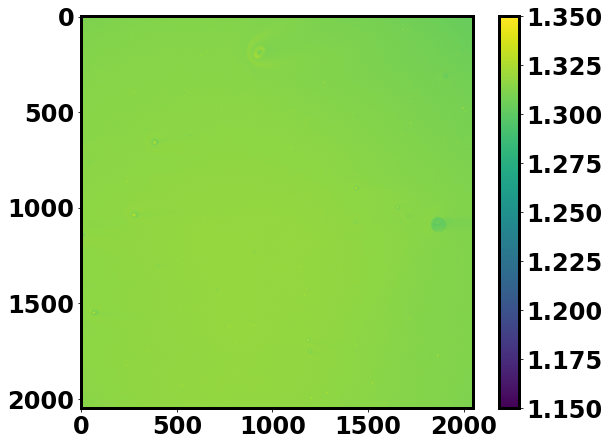

In [7]:
#im = Image.open(directory_WF + '/' + names_WF[4] + '/' + names_WF[4] + '_MMStack_Pos0.ome.tif')

#replace this with robust inference from metadata

for ii in (4,3,0,2):
    im = io.imread(directory_WF + '/' + names_WF[ii] + '/' 'Pos0/' + 'img_000000000_Default_000.tif')
    data_WF = np.array(im)

    pix_size = 1.45e-6 #m
    aI = 1.55e21 #photons/sec-m^2
    #better to replace this with metadata parsing, need to load metatdata
    idxms = names_WF[ii].find('ms')
    exp_str = names_WF[ii][idxms-3:idxms]
    if exp_str[0] == '_':
        exp_str = exp_str[1:]

    exp_time = float(exp_str)/1000 #sec

    Excitation_flux = aI #photons/sec-m^2

    #calibration, needs to be adjusted
    calibration_numbers = 150*0.46*5.84*(0.038133877331141923/0.37277650051794803)

    PLQY_ims = np.float64(data_WF)*calibration_numbers/(pix_size**2*exp_time)/Excitation_flux

    QFLS_ims = 1.529 + keV*T*np.log(PLQY_ims/100)
    
    #Z = PLQY_ims[0,250:1800,250:1800]*100
    plt.imshow(QFLS_ims,interpolation='none', vmin=1.15, vmax=1.35)
    cbar = plt.colorbar()
    plt.figure()

    
    

In [4]:
1.3/.85

1.5294117647058825